In [1]:
import sys
import os
import numpy as np
from pathlib import Path
from scipy.stats import pearsonr
root = Path(os.getcwd()).parent.parent
sys.path.append(str(Path(os.getcwd()).parent))
np.set_printoptions(threshold=sys.maxsize, suppress=True)

In [2]:
from loader import Power, Weather
from constant import FeatureType
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import argparse

In [3]:
# set korean for matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
parser = argparse.ArgumentParser()
args = parser.parse_args("")

# ====== Data ====== #
args.years = [2017, 2018, 2019]
args.region = "Jindo"
args.station = 192

# ====== Features ====== #
features = [FeatureType.SUNSHINE,
            FeatureType.GROUND_TEMPERATURE,
            FeatureType.HUMIDITY,
            FeatureType.WIND_SPEED,
            FeatureType.WIND_DIRECTION,
            FeatureType.TEMPERATURE,
            FeatureType.VISIBILITY,
            FeatureType.PRECIPITATION,
            FeatureType.STEAM_PRESSURE,
            FeatureType.DEW_POINT_TEMPERATURE,
            FeatureType.ATMOSPHERIC_PRESSURE]

power = Power(args)
weather = Weather(args, features)

power_data = power.get_data()
weather_data = weather.get_data()
weather_data.insert(0, '태양광', power_data)

0 missing dates
0 value(s) are not zero
[0, 0, 0, 0, 0, 0, 4, 28, 59, 125, 174, 223, 220, 188, 122, 33, 5, 0, 0, 0, 0, 0, 0]
0 missing dates
0 value(s) are not zero
[0, 0, 0, 0, 0, 0, 3, 21, 63, 123, 180, 233, 243, 198, 131, 31, 3, 0, 0, 0, 0, 0, 0]
0 missing dates
0 value(s) are not zero
[0, 0, 0, 0, 0, 0, 5, 22, 57, 117, 159, 0, 211, 226, 126, 92, 20, 4, 0, 0, 0, 0, 0]
missing dates: []
missing dates: ['2018-01-13 09:00', '2018-01-13 10:00', '2018-01-13 11:00', '2018-01-13 12:00', '2018-01-13 13:00']
missing dates: []


In [5]:
correlation = weather_data.corr()
correlation

,태양광,일조(hr),지면온도(°C),습도(%),풍속(m/s),풍향(16방위),기온(°C),시정(10m),강수량(mm),현지기압(hPa),이슬점온도(°C),증기압(hPa)
태양광,1.000000,0.670674,0.390508,-0.346343,0.288048,0.247795,0.204464,0.140040,-0.063741,-0.014645,-0.013233,-0.008491
일조(hr),0.670674,1.000000,0.420679,-0.597526,0.452475,0.348876,0.253454,0.278639,-0.091479,0.014197,-0.111615,-0.099545
지면온도(°C),0.390508,0.420679,1.000000,-0.049439,0.284006,0.231186,0.937549,0.097657,0.028415,-0.679334,0.731639,0.717916
습도(%),-0.346343,-0.597526,-0.049439,1.000000,-0.579963,-0.431053,0.075473,-0.556717,0.155085,-0.266977,0.578488,0.503758
풍속(m/s),0.288048,0.452475,0.284006,-0.579963,1.000000,0.574127,0.214696,0.328867,0.017397,-0.149305,-0.129165,-0.071893
풍향(16방위),0.247795,0.348876,0.231186,-0.431053,0.574127,1.000000,0.194481,0.232840,0.019196,-0.124032,-0.064966,-0.020261
기온(°C),0.204464,0.253454,0.937549,0.075473,0.214696,0.194481,1.000000,0.054782,0.056853,-0.762886,0.849695,0.834677
시정(10m),0.140040,0.278639,0.097657,-0.556717,0.328867,0.232840,0.054782,1.000000,-0.194501,0.092517,-0.219138,-0.172638
강수량(mm),-0.063741,-0.091479,0.028415,0.155085,0.017397,0.019196,0.056853,-0.194501,1.000000,-0.128344,0.117532,0.122452
현지기압(hPa),-0.014645,0.014197,-0.679334,-0.266977,-0.149305,-0.124032,-0.762886,0.092517,-0.128344,1.000000,-0.754303,-0.742669


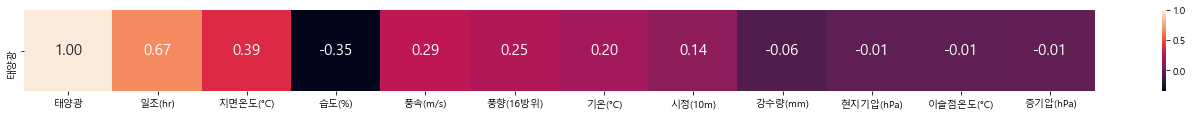

In [6]:
plt.figure(figsize=(24,1.5))
sns.heatmap(weather_data.corr().iloc[:,:1].T, annot=True, fmt=".2f", annot_kws={"size": 15})
plt.show()

In [10]:
# absolute
correlation = weather_data.corr().iloc[:,:1].abs()
correlation

,태양광
태양광,1.000000
일조(hr),0.670674
지면온도(°C),0.390508
습도(%),0.346343
풍속(m/s),0.288048
풍향(16방위),0.247795
기온(°C),0.204464
시정(10m),0.140040
강수량(mm),0.063741
현지기압(hPa),0.014645
